In [1]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
series = np.sin(0.1*np.arange(400)**2)

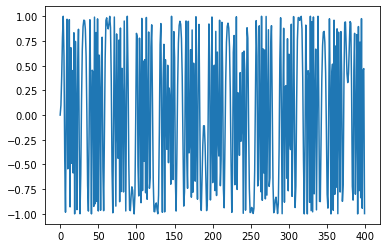

In [3]:
plt.plot(series)
plt.show()

In [4]:
T=10
D=1
X,Y=[],[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
    
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print('X.shape = ',X.shape,'Y.shape',Y.shape)

X.shape =  (390, 10) Y.shape (390,)


In [13]:
X=X.reshape(-1,T,1)
i=Input(shape=(T,D))
x=SimpleRNN(10,activation='relu')(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.02))

r=model.fit(X[:-N//2],Y[:-N//2] ,batch_size=32, epochs=200 , validation_data=(X[-N//2:], Y[-N//2:]))


Epoch 1/200
7/7 [==============================] - 0s 69ms/step - loss: 1.0723 - val_loss: 0.5950
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5604 - val_loss: 0.6088
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5430 - val_loss: 0.5530
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5044 - val_loss: 0.5336
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4906 - val_loss: 0.5172
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4769 - val_loss: 0.5034
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4648 - val_loss: 0.4862
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4479 - val_loss: 0.4710
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4337 - val_loss: 0.4610
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4230 - val_loss: 0.4556
Epoch 11/200
7/7 [======

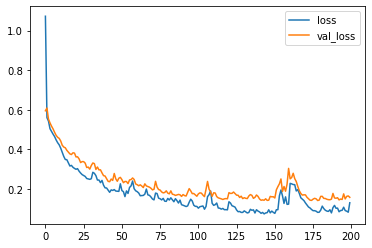

In [14]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(390, 1)


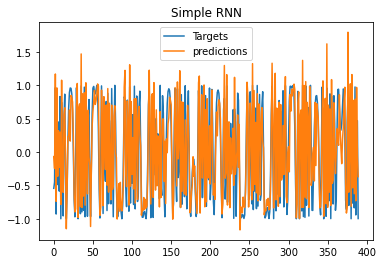

In [15]:
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y,label='Targets')
plt.plot(predictions,label='predictions')
plt.title('Simple RNN')
plt.legend()
plt.show()

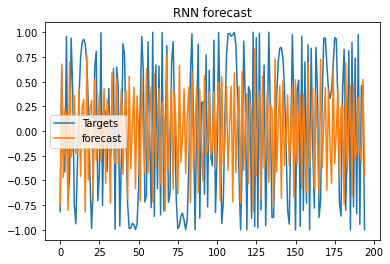

In [16]:
forecast=[]
input_=X[-N//2]
while len(forecast)<len(Y[-N//2:]):
    f=model.predict(input_.reshape(1,T,1))[0,0]
    forecast.append(f)
    input_=np.roll(input_,-1)
    input_[-1]=f

plt.plot(Y[N//2:],label='Targets')
plt.plot(forecast,label='forecast')
plt.title('RNN forecast')
plt.legend()
plt.show()